<a href="https://colab.research.google.com/github/khoa2210/KHDL/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

<Figure size 432x288 with 0 Axes>

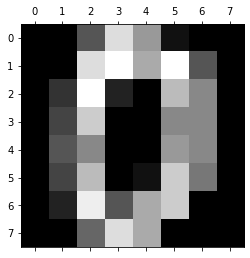

In [2]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

In [3]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

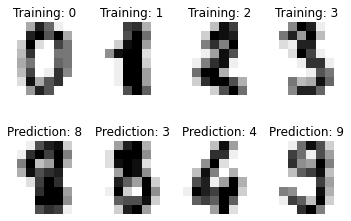

In [7]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
KNN_classifier.fit(X_train, y_train)
predicted = KNN_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)


Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.95      0.98      0.96        91
           2       0.98      0.93      0.95        86
           3       0.89      0.90      0.90        91
           4       1.00      0.95      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.95      1.00      0.97        89
           8       0.95      0.90      0.92        88
           9       0.91      0.92      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899




Text(0.5, 0.98, 'Confusion Matrix')

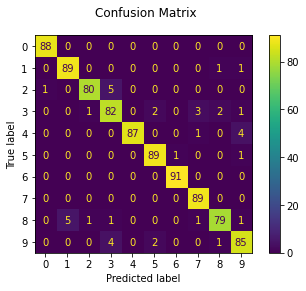

In [8]:
print("\nClassification report for classifier %s:\n%s\n" % (KNN_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(KNN_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")


In [9]:
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
plt.show()


Confusion matrix:
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  1  1]
 [ 1  0 80  5  0  0  0  0  0  0]
 [ 0  0  1 82  0  2  0  3  2  1]
 [ 0  0  0  0 87  0  0  1  0  4]
 [ 0  0  0  0  0 89  1  0  0  1]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  5  1  1  0  0  0  1 79  1]
 [ 0  0  0  4  0  2  0  0  1 85]]


In [10]:
print("\nAccuracy of the Algorithm: ", KNN_classifier.score(X_test, y_test))


Accuracy of the Algorithm:  0.9555061179087876
